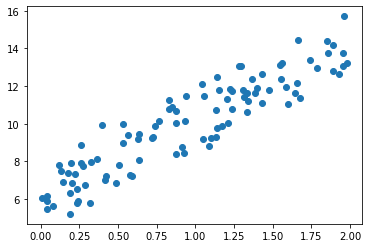

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1 = 4, w0 = 6). 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

#X , y데이터 세트 산점도로 시각화 
plt.scatter(X ,y )

In [4]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [5]:
#w1과 w0을 업데이트 할 w1_update, w0_update를 반환 
def get_weight_updates(w1, w0, X , y, learning_rate = 0.01):
    N = len(y)
    #먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화 
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산 
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N, 1))
    
    #w1과 w0을 업데이트 할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N)* learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [6]:
#입력인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함 
def gradient_descent_steps(X, y, iters = 1000):
    #w0과 w1을 모두 0으로 초기화 
    w0 = np.zeros((1,1))
    w1= np.zeros((1,1))
    
    #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행 
    for ind in range(iters):
        w1_update , w0_update = get_weight_updates(w1, w0 ,X, y, learning_rate = 0.01)
        w1 = w1- w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [7]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost


w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print("w1 : {0:.3f} w0 : {1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0, 0] * X + w0

print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.022 w0 : 6.162
Gradient Descent Total Cost : 0.9935


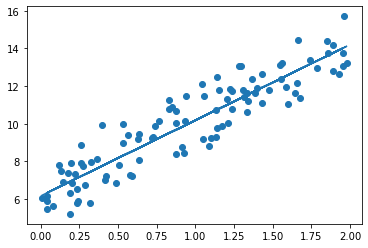

In [8]:
plt.scatter(X, y)
plt.plot(X, y_pred)

일반 경사하강법은 전체 입력 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 하기 때문에, 수행시간이 매우 오래 걸린다는 단점

따라서, 확률적 경사하강법을 사용한다. 

- 확률적 경사하강법 : 

일부 데이터만 이용하여 w가 업데이트 되는 값을 계산하므로, 일반 경사하강법에 비해서 빠른 속도를 보장한다.

밑에서는 (미니 배치) 확률적 경사 하강법을 stochastic_gradient_descent_stops() 함수로 구현 

In [9]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        #전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이트를 추출해 sample_X, sample_y로 저장 
        stochastic_random_index = np.random.permutation(X.shape[0])
        #np.random.permutation은 기존에 있는 배열에서 순서를 무작위로 섞은 것(Shape은 입력한 데이터와 동일 )
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update , w0_update 계산 후 업데이트 
        w1_update , w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
        w1 = w1 - w1_update 
        w0 = w0 - w0_update
        
        
    return w1, w0

In [10]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print("w1 : ", round(w1[0,0], 3), "w0 : ", round(w0[0,0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1 :  4.028 w0 :  6.156
Stochastic Gradient Descent Total Cost:0.9937


미니 배치 확률적 경사하강법으로 구한 결과 값은 일반 경사하강법으로 구한 값과 큰 차이가 없으며, 

큰 예측 성능 상의 차이가 없음을 알 수 있다. 

따라서, 큰 데이터를 다루는 경우에는 시간 관계상 확률적 경사 하강법을 사용한다.

# LinearRegression 클래스

 LinearRegression 클래스는 예측값과 실제 값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스이다. 
 
 fit() 매서드로 X, y를 입력 받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장한다. 

In [11]:
from sklearn.linear_model import LinearRegression

C:\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
C:\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
C:\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#boston 데이터 세트 로드 
boston = load_boston()

#boston 데이터 세트 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


데이터 세트 피처의 Null값은 없으며 모두 float 형이다.

### 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화

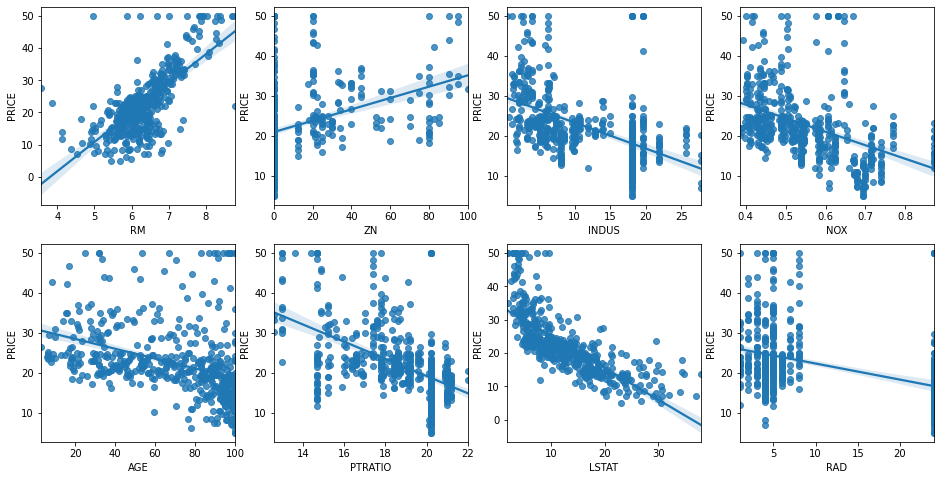

In [14]:
#2개의 행과 4개의 열을 가진 subplots 이용. axs는 4X2개의 ax를 가짐 
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현 
    sns.regplot(x=feature, y = 'PRICE', data = bostonDF, ax= axs[row][col])

위의 그래프를 보면 양의 선형성은 RM(방개수)가 가장 크고, 

LSTAT(하위 계층의 비율)이 음의 선형성이 가장 크다는 것을 볼수 있다. 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

#선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression(fit_intercept = True, normalize=False, copy_X = True, n_jobs = 1)
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score  :{0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.306, RMSE : 4.160
Variance score  :0.757


In [16]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 : ', np.round(lr.coef_, 1))

절편 값 :  40.995595172164556
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


coef_ 속성은 회귀 계수 **값**만 가지고 있으므로 이를 보기 쉽게 출력하기 위해서 따로 feature_names를 가져와야 한다.

In [17]:
#회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의 
coeff = pd.Series(data=np.round(lr.coef_,1), index = X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [18]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression(fit_intercept = True, normalize=False, copy_X = True, n_jobs = 1)


#cross_val_score() 로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-12.48 -26.1  -33.12 -80.83 -33.58]
5 folds의 개별 RMSE scores :  [3.53 5.11 5.75 8.99 5.8 ]
5 folds의 평균 RMSE : 5.836


# 다항회귀 

회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항(Polynomial)회귀라고 한다. 

다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀이다. 

선형/ 비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이다. 

In [19]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성 
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 : \n', X)

#degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환 
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 :\n', poly_ftr)

일차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 :
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [20]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature :\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 feature :
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [21]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature : \n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인 
model = LinearRegression(fit_intercept = True, normalize=False, copy_X = True, n_jobs = 1)
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 : \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

3차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 : 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape :  (10,)


In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2 * X[:, 0] + 3*X[:,0]**2 + 4*X[:, 1]**3
    return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결 
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression(fit_intercept = True, normalize=False, copy_X = True, n_jobs = 1))])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [23]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터 입니다. 
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987231741 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899340e+05 -1.87416086e+06  2.03716240e+07
 -1.44873341e+08  7.09315840e+08 -2.47066022e+09  6.24561781e+09
 -1.15676672e+10  1.56895187e+10 -1.54006300e+10  1.06457475e+10
 -4.91378589e+09  1.35919961e+09 -1.70381209e+08] 입니다.
Degree 15 MSE 는 182594790.078965 입니다.


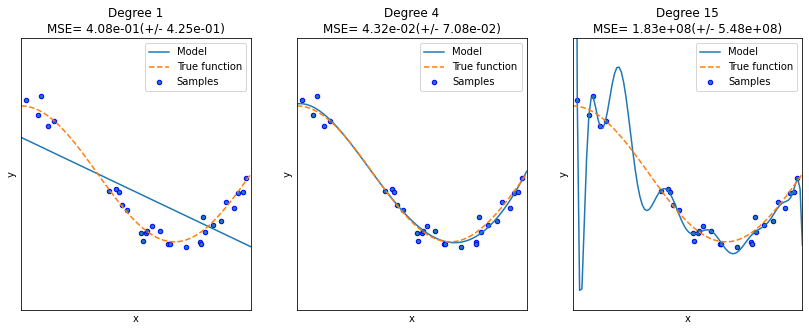

In [24]:
plt.figure(figsize = (14,5))
degrees = [1, 4,15]

#다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    #개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    #교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = 10)
    #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀 계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor ='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y");plt.xlim((0,1)); plt.ylim((-2, 2));plt.legend(loc="best")
    plt.title("Degree {}\nMSE= {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

# 릿지 회귀

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha = 10으로 설정해 릿지 회귀 수행 
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-11.437 -24.291 -28.17  -74.673 -28.719]
5 folds 의 개별 RMSE scores :  [3.382 4.929 5.308 8.641 5.359]
5 folds 의 평균 RMSE : 5.524


In [32]:
#릿지에 사용될 alpha 파라미터의 값을 정의 
alphas =  [0, 0.1, 1, 10, 100]

#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산 
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.836
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.796
alpha 1 일 때 5 folds의 평균 RMSE : 5.659
alpha 10 일 때 5 folds의 평균 RMSE : 5.524
alpha 100 일 때 5 folds의 평균 RMSE : 5.332


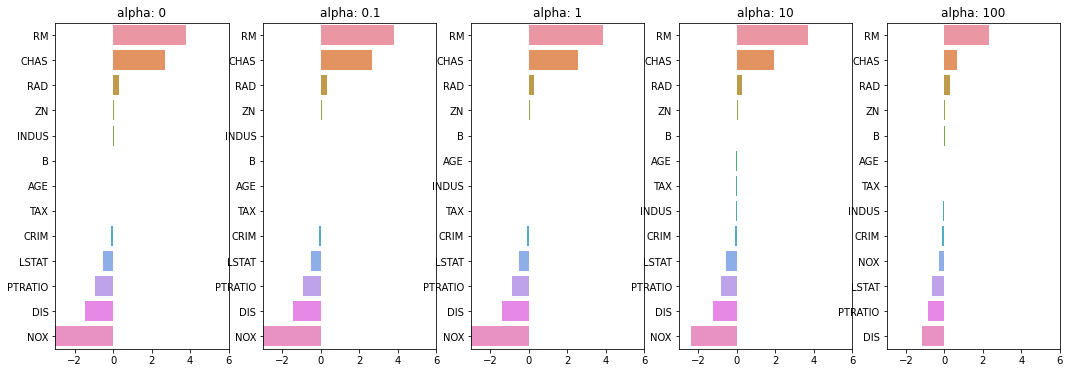

In [27]:
#각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)
#각 alpha에 따른 회귀 께수 값을 데이터로 저장하기 위한 DataFrame 형성 
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가 
    coeff=  pd.Series(data= ridge.coef_, index = X_data.columns)
    colname = 'alpha: '+ str(alpha)
    coeff_df[colname] = coeff
    #막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y = coeff.index, ax = axs[pos])
    
#for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시 
plt.show()

In [35]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values( by=sort_column, ascending=False )

KeyError: 'alpha:0'

In [44]:
from sklearn.linear_model import Lasso, ElasticNet

#alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고, 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n= None, y_target_n = None, verbose = True):
    coeff_df = pd.DataFrame()
    if verbose : print('#####', model_name, '#####')
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha = param)
        elif model_name == 'Lasso' : model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = "neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일때 5 폴드 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
        #cross_val_score는 evaluation metric만 반환하므로, 모델을 다시 학습하여 회귀 계수 추출 
        model.fit(X_data, y_target)
        #alpha에 따른 피처별 회귀 계수를 Series로 반환하고 이를 DataFrame의 칼럼으로 추가 
        coeff = pd.Series(data = model.coef_, index = X_data.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
#end of get_linear_regre_eval

In [45]:
#라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출 
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval(model_name = 'Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

##### Lasso #####
alpha 0.07 일때 5 폴드 세트의 평균 RMSE : 5.618
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 5.621
alpha 0.5 일때 5 폴드 세트의 평균 RMSE : 5.672
alpha 1 일때 5 폴드 세트의 평균 RMSE : 5.776
alpha 3 일때 5 폴드 세트의 평균 RMSE : 6.189


In [47]:
#반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력 
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.785460,3.698943,2.494509,0.946786,0.000000
CHAS,1.436287,0.957097,0.000000,0.000000,0.000000
RAD,0.270327,0.274112,0.277118,0.264175,0.061867
ZN,0.049026,0.049179,0.049528,0.049169,0.037231
B,0.010326,0.010327,0.009532,0.008291,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011675,-0.010006,0.003630,0.020927,0.042495
TAX,-0.014287,-0.014567,-0.015440,-0.015209,-0.008602
INDUS,-0.041924,-0.036425,-0.005109,-0.000000,-0.000000
CRIM,-0.097061,-0.096788,-0.082662,-0.063423,-0.000000


In [48]:
#엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출 
#l1_ratio는 0.7로 고정 
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n = X_data , y_target_n = y_target)

##### ElasticNet #####
alpha 0.07 일때 5 폴드 세트의 평균 RMSE : 5.546
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 5.530
alpha 0.5 일때 5 폴드 세트의 평균 RMSE : 5.468
alpha 1 일때 5 폴드 세트의 평균 RMSE : 5.596
alpha 3 일때 5 폴드 세트의 평균 RMSE : 6.068


In [49]:
#반환된 coeff_elastic_df를 첫번쨰 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력 
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.570126,3.410274,1.915894,0.937179,0.000000
CHAS,1.332117,0.980900,0.000000,0.000000,0.000000
RAD,0.278304,0.282881,0.300449,0.289167,0.147089
ZN,0.050074,0.050586,0.052860,0.052126,0.038281
B,0.010200,0.010145,0.009182,0.008373,0.007029
AGE,-0.010084,-0.008248,0.007777,0.020360,0.043445
TAX,-0.014519,-0.014810,-0.016044,-0.016213,-0.011417
INDUS,-0.044641,-0.042520,-0.023093,-0.000000,-0.000000
CRIM,-0.098392,-0.098179,-0.088550,-0.073471,-0.019596
NOX,-0.178164,-0.000000,-0.000000,-0.000000,-0.000000


In [50]:
#method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정 
#p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.
def get_scaled_data(method ='None', p_degree=None, input_data = None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree = p_degree, include_bias = False).fit_transform(scaled_data)
        
    return scaled_data

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Ridege의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]

#5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준 정규 분포 + 다항식 특성, 로그 변환 
scale_methods= [(None, None), ('Standard', None), ('Standard', 2),
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], 
                                   input_data = X_data)
    print('\n## 변환 유형 : {0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n = X_data_scaled, 
                       y_target_n = y_target, verbose = False)


## 변환 유형 : None, Polynomial Degree:None
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 5.796
alpha 1 일때 5 폴드 세트의 평균 RMSE : 5.659
alpha 10 일때 5 폴드 세트의 평균 RMSE : 5.524
alpha 100 일때 5 폴드 세트의 평균 RMSE : 5.332

## 변환 유형 : Standard, Polynomial Degree:None
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 5.834
alpha 1 일때 5 폴드 세트의 평균 RMSE : 5.810
alpha 10 일때 5 폴드 세트의 평균 RMSE : 5.643
alpha 100 일때 5 폴드 세트의 평균 RMSE : 5.424

## 변환 유형 : Standard, Polynomial Degree:2
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 8.776
alpha 1 일때 5 폴드 세트의 평균 RMSE : 6.849
alpha 10 일때 5 폴드 세트의 평균 RMSE : 5.487
alpha 100 일때 5 폴드 세트의 평균 RMSE : 4.631

## 변환 유형 : MinMax, Polynomial Degree:None
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 5.770
alpha 1 일때 5 폴드 세트의 평균 RMSE : 5.468
alpha 10 일때 5 폴드 세트의 평균 RMSE : 5.755
alpha 100 일때 5 폴드 세트의 평균 RMSE : 7.635

## 변환 유형 : MinMax, Polynomial Degree:2
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 5.294
alpha 1 일때 5 폴드 세트의 평균 RMSE : 4.320
alpha 10 일때 5 폴드 세트의 평균 RMSE : 5.186
alpha 100 일때 5 폴드 세트의 평균 RMSE : 6.538

## 변환 유형 : Log, Polynomial Degree:None
alph